In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.cross_validation import KFold, cross_val_score
import sklearn
import warnings
warnings.filterwarnings('ignore')
%pylab inline
%matplotlib inline
csv_clean = pd.read_csv('census.csv')

Populating the interactive namespace from numpy and matplotlib


In [10]:
csv_clean

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [11]:
csv_clean = csv_clean.dropna()
csv_clean

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [12]:
csv_clean = csv_clean[csv_clean.occupation != '?']

In [13]:
csv_clean

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K


In [4]:
#csv_clean['workclass_numeric'] = csv_clean.workclass.map({'Private':0, 'Self-emp-not-inc':1, 'Self-emp-inc':2, 'Self-emp-not-inc':3, 'Federal-gov':4, 'Local-gov':5, 'State-gov':6, 'Without-pay':7, 'Never-worked':8})
csv_clean['workclass_numeric'] = csv_clean.workclass.map({'Private':0, 'Self-emp-not-inc':1, 'Self-emp-inc':2, 'Federal-gov':3, 'Local-gov':4, 'State-gov':5, 'Without-pay':6, 'Never-worked':7})
csv_clean['marital_numeric'] = csv_clean['marital.status'].map({'Married-civ-spouse':0, 'Divorced':1, 'Never-married':2, 'Never-married':3, 'Separated':4, 'Widowed':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})
csv_clean['race_numeric'] = csv_clean.race.map({'White':0, 'Asian-Pac-Islander':1, 'Amer-Indian-Eskimo':2, 'Black':3, 'Other':4})
csv_clean['rel_numeric'] = csv_clean.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Other-relative':0, 'Own-child':1, 'Husband':1, 'Wife':1})
csv_clean['sex_numeric'] = csv_clean.sex.map({'Male':0, 'Female':1})
csv_clean['income_over_50K'] = np.where(csv_clean.income == '<=50K', 0, 1)
csv_clean[:10]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,workclass_numeric,marital_numeric,race_numeric,rel_numeric,sex_numeric,income_over_50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356,18,United-States,<=50K,0,4,0,0,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900,40,United-States,<=50K,0,1,0,0,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900,40,United-States,<=50K,0,4,0,1,1,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,3770,45,United-States,<=50K,0,1,0,0,1,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,3770,40,United-States,<=50K,0,4,0,0,0,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,...,3683,20,United-States,>50K,5,3,0,0,1,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,...,3683,40,United-States,<=50K,3,1,0,0,1,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,...,3004,60,?,>50K,0,3,0,0,0,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,...,3004,35,United-States,>50K,0,1,3,0,1,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,...,2824,45,United-States,>50K,1,3,0,0,0,1


In [5]:
X = csv_clean[['workclass_numeric', 'education.num', 'marital_numeric', 'race_numeric', 'sex_numeric', 'rel_numeric', 'capital.gain', 'capital.loss']]
y = csv_clean.income_over_50K

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.4)

In [7]:
clf = RandomForestClassifier(n_estimators=25)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
# Apply same above for Logistic Regression, just need to change RFC
# to LR and print out accuracy score
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[8625,  561],
       [1294, 1808]])

In [8]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.84903971354166663

In [9]:
scores = cross_val_score(clf, X, y)
scores.mean()

0.81274798271824233

array([ 0.84244792,  0.84781901,  0.8453776 ,  0.84895833,  0.84350586,
        0.84928385,  0.84969076,  0.84952799,  0.84765625,  0.84977214,
        0.84667969,  0.84798177,  0.84887695,  0.84814453,  0.84863281,
        0.85042318,  0.8503418 ,  0.84977214,  0.84855143,  0.85050456,
        0.84676107,  0.84790039,  0.84871419,  0.85026042,  0.84871419])

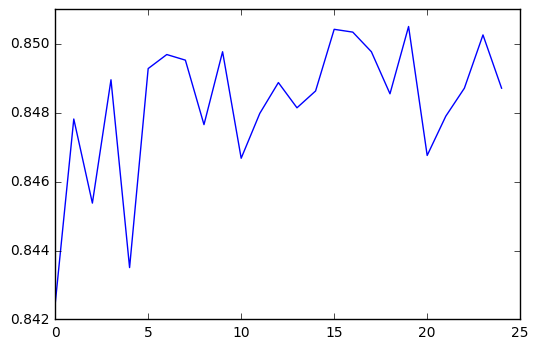

In [10]:
trees = range(25)
accuracy = np.zeros(25)
for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i + 1)
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy[i]=sklearn.metrics.accuracy_score(y_test, pred)
plt.cla()
plt.plot(trees, accuracy)
accuracy

In [11]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_train, y_train)
fea_imp = extra_tree.feature_importances_
print(fea_imp)

[ 0.04999393  0.24948955  0.22265049  0.02082124  0.04776262  0.11170692
  0.2095842   0.08799105]


In [12]:
max_fea_imp = max(fea_imp)
max_fea_imp

0.24948955397445846

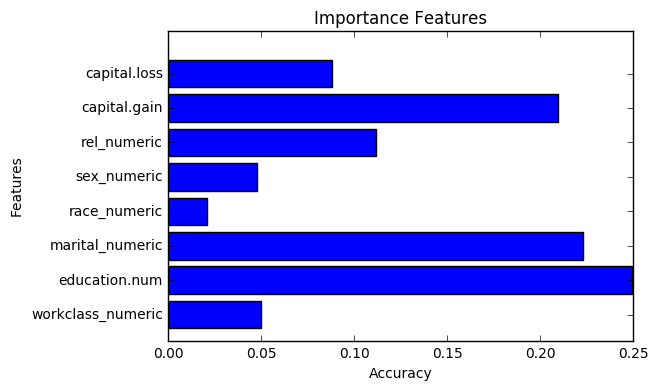

In [13]:
pos = np.arange(8) + 0.75
plt.barh(pos, fea_imp, align='center')
plt.yticks(pos, ('workclass_numeric', 'education.num', 'marital_numeric', 'race_numeric', 'sex_numeric', 'rel_numeric', 'capital.gain', 'capital.loss'))
plt.xlabel('Accuracy')
plt.ylabel('Features')
plt.title('Importance Features')
plt.grid(False)

In [14]:
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
# Apply same above for Logistic Regression, just need to chance RFC
# to LR and print out accuracy score
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[8467,  719],
       [1384, 1718]])

In [15]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.828857421875